## Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Criando o cenario

In [260]:
num_of_samples = 100000

transaction_amount = np.minimum(np.random.lognormal(4.0, 1.4, 100000), 10000)
international_purchase = np.random.binomial(1,
                                            0.001 *
                                            transaction_amount / np.linalg.norm(transaction_amount),
                                            num_of_samples)

In [287]:
target = (np.random.standard_cauchy(num_of_samples) 
          * transaction_amount
          * np.where(international_purchase, 0.4, 0.1))

target = np.where(target > np.quantile(target, 0.97), 1, 0)

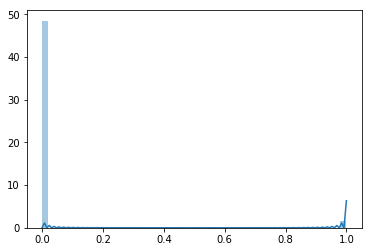

In [288]:
sns.distplot(target)

In [289]:
scores = np.where(target, 
                  np.maximum(np.minimum(np.random.normal(0.6, 0.5, num_of_samples), 1.0), 0.0),
                  np.maximum(np.minimum(np.random.normal(0.2, 0.3, num_of_samples), 1.0), 0.0))  

In [290]:
df = pd.DataFrame(
    {"amount": transaction_amount,
     "international_purchase": international_purchase,
     "is_fraud": target,
      "score": scores}
)

df

,amount,international_purchase,is_fraud,score
0,29.631266,0,0,0.000000
1,36.306984,0,0,0.000000
2,57.014104,0,0,0.068215
3,19.914813,0,0,0.553946
4,20.927739,0,0,0.423519
5,38.354184,0,0,0.368673
6,89.586760,0,0,0.114290
7,141.987393,0,0,0.466772
8,532.608036,0,0,0.127707
9,277.183184,0,0,0.180107


In [291]:
np.mean(transaction_amount)

144.71262171585292

In [173]:
# df = pd.read_csv("data_fraud_20200101_20201231_2.csv", sep=',', delimiter=None, 
#                 header='infer', names=None, 
#                 index_col=None, usecols=None, squeeze=False, engine=None)

# df = df.loc[~df.is_fraud.isnull()]

# df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,score,international_transaction
0,2020-01-01 00:00:57,2286236465059468,fraud_Kunde-Sanford,misc_net,9.13,Morgan,Murray,F,2788 Brittney Island,Blairstown,...,467,Agricultural consultant,1950-05-27,59e089f4b553f5d7ce7a37235dd40a98,1356998457,37.928457,-94.266468,0,0.007170,0
1,2020-01-01 00:01:28,4538566639857,"fraud_Tromp, Kerluke and Glover",grocery_net,68.31,Jerry,Kelly,M,3539 Mckenzie Stream,Fairview,...,13835,"Programmer, multimedia",1967-05-28,ab426adf393f1d668b70d2a7d5a14093,1356998488,40.737538,-73.048997,0,0.005252,0
2,2020-01-01 00:04:56,3596357274378601,fraud_Koelpin and Sons,misc_net,2.28,David,Everett,M,4138 David Fall,Morrisdale,...,3688,Advice worker,1973-05-27,91de69a34cf6439c10c9d7d32c94c0a3,1356998696,41.319524,-78.485597,0,0.007170,0
3,2020-01-01 00:05:12,4355790796238264643,fraud_Metz-Boehm,shopping_pos,35.10,Tanner,Davis,M,2632 Stevens Light Apt. 213,Payson,...,1656,Exhibition designer,1969-08-04,fbe4d5eb2e105c3a45c098b3a10679ab,1356998712,38.928836,-91.610756,0,0.006785,0
4,2020-01-01 00:06:14,30248898834493,fraud_Parisian and Sons,gas_transport,62.70,Michael,Rodriguez,M,172 Paula Inlet Apt. 650,Cross Plains,...,1897,Chief Operating Officer,1953-04-19,ddb1e42bf5b4e638a6496fb552047ced,1356998774,32.172294,-99.854116,0,0.007595,0


In [292]:
df.shape

(100000, 4)

In [296]:
review_fraud_cost = 8.0
interchange_revenue = 0.015
target_col = "is_fraud"
prediction_col = "score"
amount_col = "amount"
blocked_col = "blocked"

In [297]:
df[target_col].value_counts()

0    97000
1     3000
Name: is_fraud, dtype: int64

In [298]:
df[amount_col].mean()

144.71262171585292

In [299]:
df[target_col].mean()

0.03

In [300]:
df.isnull().sum()

amount                    0
international_purchase    0
is_fraud                  0
score                     0
dtype: int64

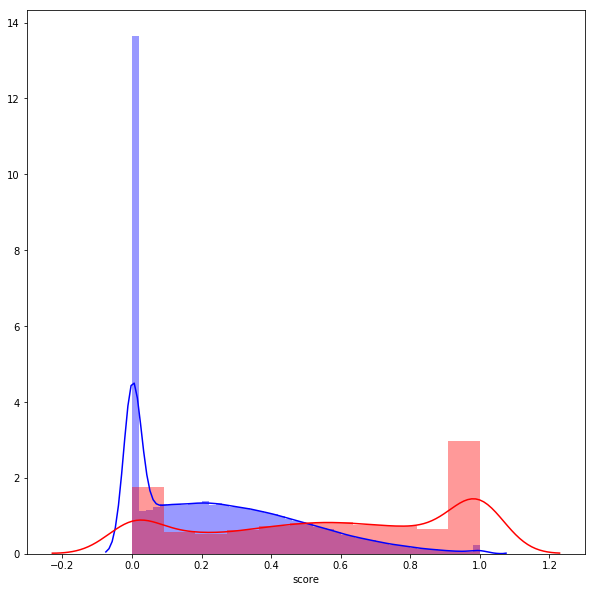

In [301]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.distplot(df.loc[lambda df: df[target_col] == 0][prediction_col], ax=ax, color="b")
sns.distplot(df.loc[lambda df: df[target_col] == 1][prediction_col], ax=ax, color="r")

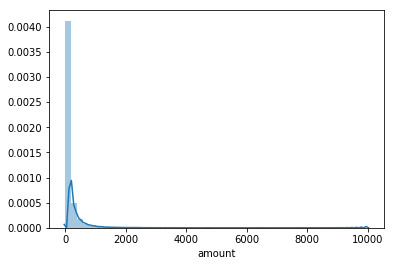

In [302]:
sns.distplot(df[amount_col])

## Metricas basicas recap
Como temos um problema de classificação, vamos focar nas metricas basicas de classificação AUC, Logloss, Matriz de Confusão

In [303]:
from sklearn.metrics import auc, log_loss, roc_curve, confusion_matrix, precision_recall_curve

In [304]:
fpr, tpr, thresholds = roc_curve(df[target_col], df[prediction_col])
auc(fpr, tpr)

0.7520448109965636

In [305]:
precision, recall, thresholds = precision_recall_curve(df[target_col], df[prediction_col])
auc(recall, precision)

0.2989875489551892

In [306]:
log_loss(df[target_col], df[prediction_col])

0.6097630602105427

In [307]:
threshold = 0.1 # definindo um threshold arbitrario pra gerar a matrix de confusao
# o estudo de thresholds vira na sequencia
cf_matrix = confusion_matrix(df[target_col], df[prediction_col] > threshold)
cf_matrix


array([[35869, 61131],
       [  492,  2508]])

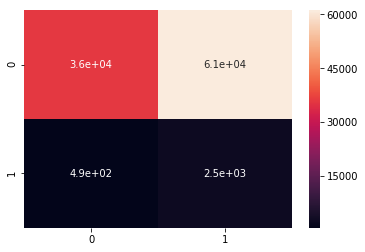

In [308]:
sns.heatmap(cf_matrix, annot=True)

## Validação na vida real

Como mencionado nos slides, se dois grupos diferentes tem comportamentos diferentes ou impactam o negócio de maneira distinta, é fundamental avaliar a performance de ambos separadamente

In [310]:
national_df = df.loc[df.international_purchase == 0]
fpr_national, tpr_national, thresholds_national = roc_curve(national_df[target_col], national_df[prediction_col])
auc(fpr_national, tpr_national)

0.7527003092557157

In [311]:
international_df = df.loc[df.international_purchase == 1]
fpr_international, tpr_international, thresholds_international = roc_curve(international_df[target_col], international_df[prediction_col])
auc(fpr_international, tpr_international)

0.6691666666666667

## Definindo um threshold
Aqui desejamos achar um corte que maximize a nossa lucrativade

Primeiro, vamos definir uma função pra calcular o custo de um conjunto de decisões

Depois, podemos gerar todos os thresholds possiveis e qual seria o label de cada transação nesse caso

In [312]:
def profit_from_decision(decision_df):
    # decision_df must have a column `is_fraud` indicating the decision
    # target represents the true information if that transaction was a fraud or not
    # transaction_amount is used to calculate revenues and costs
    return decision_df.assign(
     operational_cost = lambda df: df[blocked_col] * review_fraud_cost,
     fraud_losses = lambda df: ((~df[blocked_col]) & (df[target_col])) * df[amount_col],
     revenues = lambda df: ((~df[blocked_col]) & (~df[target_col])) * df[amount_col] * interchange_revenue,
     profit = lambda df: df.revenues - (df.fraud_losses + df.operational_cost)
    )[["operational_cost", "fraud_losses", "revenues", "profit"]].sum()

In [315]:
possible_thresholds = np.arange(0.001, 1.0, 0.05)
all_decisions = []
for threshold in possible_thresholds: 
    all_decisions.append(profit_from_decision(df.assign(blocked=lambda df: df[prediction_col] >= threshold)))
    

threshold_evaluation = pd.concat(all_decisions, axis=1, keys=[s for s in possible_thresholds]).T.rename_axis("threshold").reset_index()

threshold_evaluation.head(5)

,threshold,operational_cost,fraud_losses,revenues,profit
0,0.001,602168.0,245097.063642,46203.571693,-801061.491949
1,0.051,557408.0,283633.916229,57348.766114,-783693.150114
2,0.101,507936.0,329475.433718,69534.786763,-767876.646954
3,0.151,457008.0,372462.387627,81399.907849,-748070.479778
4,0.201,404672.0,430200.066602,93499.878381,-741372.188221


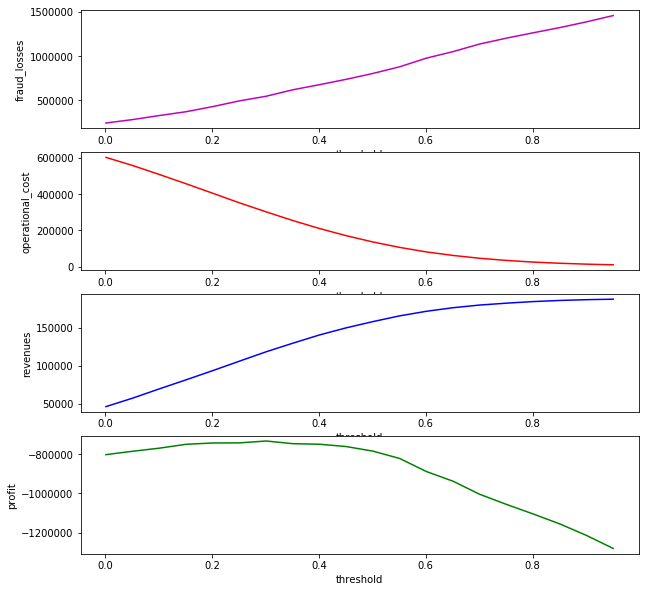

In [316]:
fig, ax = plt.subplots(4, 1, figsize=(10, 10))
sns.lineplot(threshold_evaluation.threshold, threshold_evaluation.fraud_losses, color="m", ax=ax[0])
sns.lineplot(threshold_evaluation.threshold, threshold_evaluation.operational_cost, color="r", ax=ax[1])
sns.lineplot(threshold_evaluation.threshold, threshold_evaluation.revenues, color="b", ax=ax[2])
sns.lineplot(threshold_evaluation.threshold, threshold_evaluation.profit, color="g", ax=ax[3])

# plt.title("Costs (g), Revenues (b), Profit (r)")

In [317]:
best_decision = threshold_evaluation.loc[lambda df: df["profit"].idxmax()]
best_decision

threshold                0.301000
operational_cost    302232.000000
fraud_losses        547208.063450
revenues            118257.275502
profit             -731182.787948
Name: 6, dtype: float64

## Calibrando um modelo

Para construção de um modelo de negócio que utilize as probabilidades, é fundamental que essas probabilidades estejam calibradas com o target

### Calibração

In [318]:
from fklearn.training.calibration import isotonic_calibration_learner
isotonic_calibration_fn, transformed_df, logs = isotonic_calibration_learner(df,
                                                                             target_column=target_col,
                                                                            prediction_column=prediction_col)
transformed_df

,amount,international_purchase,is_fraud,score,calibrated_prediction
0,29.631266,0,0,0.000000,0.013120
1,36.306984,0,0,0.000000,0.013120
2,57.014104,0,0,0.068215,0.013120
3,19.914813,0,0,0.553946,0.038885
4,20.927739,0,0,0.423519,0.025026
5,38.354184,0,0,0.368673,0.017931
6,89.586760,0,0,0.114290,0.013120
7,141.987393,0,0,0.466772,0.025026
8,532.608036,0,0,0.127707,0.013120
9,277.183184,0,0,0.180107,0.013120


(array([95056.,  2354.,   583.,   720.,   279.,     0.,     0.,     0.,
            0.,  1008.]),
 array([0.01311993, 0.07500238, 0.13688484, 0.19876729, 0.26064974,
        0.32253219, 0.38441464, 0.44629709, 0.50817954, 0.57006199,
        0.63194444]),
 <a list of 10 Patch objects>)

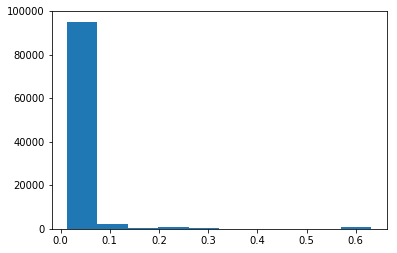

In [319]:
plt.hist(transformed_df["calibrated_prediction"])

### Gerando o ponto otimo da curva de otimização

In [320]:

transaction_amounts = np.arange(10, 20000, 10)
break_even_p = []
for amount in transaction_amounts:
    break_even_p.append(max((0, amount * interchange_revenue - review_fraud_cost)/ (amount * (1 + interchange_revenue))))
    
    
breakeven_df = pd.DataFrame(
    {amount_col: transaction_amounts,
    "reproval_prob": break_even_p}
)

breakeven_df.head(50)

,amount,reproval_prob
0,10,0.0
1,20,0.0
2,30,0.0
3,40,0.0
4,50,0.0
5,60,0.0
6,70,0.0
7,80,0.0
8,90,0.0
9,100,0.0


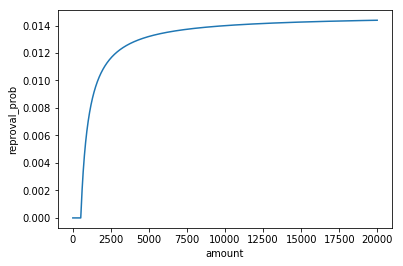

In [321]:
sns.lineplot(breakeven_df[amount_col], breakeven_df.reproval_prob)

### Calculando a lucratividade dessa otimização

In [325]:
otimization_df = (transformed_df.merge(breakeven_df, on=amount_col, how="left")
                    .assign(blocked=lambda df: df.calibrated_prediction <= df.reproval_prob))
profit_from_decision(otimization_df)

/Users/henriquelopes/miniconda3/lib/python3.6/site-packages/pandas/core/reshape/merge.py:938: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  'representation', UserWarning)


operational_cost    5.600000e+01
fraud_losses        1.870174e+06
revenues            1.879663e+05
profit             -1.682264e+06
dtype: float64

## Criando bandas de modelo

### Bandas de mesma largura

In [326]:
band_size = 0.1
binned_df = df.assign(prediction_band = lambda df: np.floor(df[prediction_col] / band_size))
binned_df

,amount,international_purchase,is_fraud,score,prediction_band
0,29.631266,0,0,0.000000,0.0
1,36.306984,0,0,0.000000,0.0
2,57.014104,0,0,0.068215,0.0
3,19.914813,0,0,0.553946,5.0
4,20.927739,0,0,0.423519,4.0
5,38.354184,0,0,0.368673,3.0
6,89.586760,0,0,0.114290,1.0
7,141.987393,0,0,0.466772,4.0
8,532.608036,0,0,0.127707,1.0
9,277.183184,0,0,0.180107,1.0


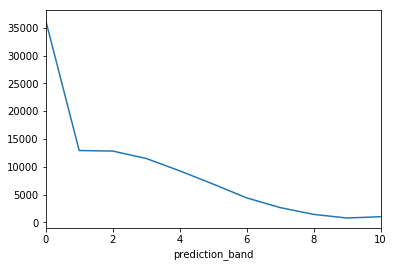

In [328]:
binned_df.groupby("prediction_band").count().amount.plot()

### Bandas de mesma quantidade de clientes

In [331]:
## This function is not "learning" how to band and we can't apply the same rule to new clients
number_of_bands = 10
banded_df = df.assign(bands= lambda df: pd.qcut(df[prediction_col], number_of_bands, duplicates="drop", retbins=False))

In [332]:
banded_df.bands.value_counts()

(-0.001, 0.0482]    30000
(0.605, 1.0]        10000
(0.465, 0.605]      10000
(0.367, 0.465]      10000
(0.282, 0.367]      10000
(0.206, 0.282]      10000
(0.128, 0.206]      10000
(0.0482, 0.128]     10000
Name: bands, dtype: int64

In [333]:
from fklearn.training.transformation import discrete_ecdfer

In [334]:
predict_fn, uniform_df, _ = discrete_ecdfer(df, 
                                            prediction_column=prediction_col, 
                                            max_range=1000)
uniform_df 

,amount,international_purchase,is_fraud,score,prediction_ecdf
0,29.631266,0,0,0.000000,246
1,36.306984,0,0,0.000000,246
2,57.014104,0,0,0.068215,323
3,19.914813,0,0,0.553946,868
4,20.927739,0,0,0.423519,760
5,38.354184,0,0,0.368673,702
6,89.586760,0,0,0.114290,381
7,141.987393,0,0,0.466772,801
8,532.608036,0,0,0.127707,399
9,277.183184,0,0,0.180107,466


In [335]:
## predict_fn "learns" how to apply the transformation and can be reapplied to any dataframe
predict_fn(uniform_df)

,amount,international_purchase,is_fraud,score,prediction_ecdf
0,29.631266,0,0,0.000000,246
1,36.306984,0,0,0.000000,246
2,57.014104,0,0,0.068215,323
3,19.914813,0,0,0.553946,868
4,20.927739,0,0,0.423519,760
5,38.354184,0,0,0.368673,702
6,89.586760,0,0,0.114290,381
7,141.987393,0,0,0.466772,801
8,532.608036,0,0,0.127707,399
9,277.183184,0,0,0.180107,466


(array([32199.,  7500.,  7600.,  7500.,  7500.,  7600.,  7500.,  7600.,
         7500.,  7501.]),
 array([ 246. ,  321.4,  396.8,  472.2,  547.6,  623. ,  698.4,  773.8,
         849.2,  924.6, 1000. ]),
 <a list of 10 Patch objects>)

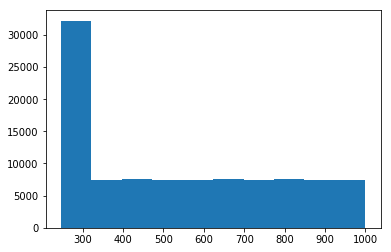

In [336]:
plt.hist(uniform_df["prediction_ecdf"])

### Regra baseada em grupos pre definidos

In [337]:
profit_from_decision(transformed_df.assign(blocked=lambda df: 
                      np.where(df.calibrated_prediction < 0.005, 0, 
                               np.where((df.calibrated_prediction >= 0.005) & (df.calibrated_prediction < 0.01) & (df[amount_col] < 100), 0, 1))
))

operational_cost    8.000000e+05
fraud_losses        0.000000e+00
revenues           -4.341379e+05
profit             -1.234138e+06
dtype: float64

## Regras de Negócio

In [338]:
profit_from_decision(otimization_df.assign(blocked= lambda df: (df.blocked) | (df[amount_col] > 1000)))

operational_cost     14896.000000
fraud_losses        779280.837370
revenues            152623.701361
profit             -641553.136009
dtype: float64